<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_0_3_0_7_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.3_0.7'

In [4]:
os.listdir(base_path)

['data_groupwise_0.3_0.7_n20.csv',
 'data_groupwise_0.3_0.7_n30.csv',
 'data_groupwise_0.3_0.7_n60.csv',
 'data_groupwise_0.3_0.7_n120.csv',
 'data_groupwise_0.3_0.7_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.542793,53.333570,83.351238,0.359214,215.586815,215.321525,0.265290
1,0.0,1.0,74.567486,46.441789,29.436098,0.110238,160.555611,160.482213,0.073398
2,0.0,2.0,62.613577,77.383451,89.448904,-0.242027,239.203905,239.484785,-0.280880
3,0.0,3.0,38.824319,21.357612,26.691584,-0.616457,96.257058,97.158583,-0.901525
4,0.0,4.0,47.011889,63.560654,41.162665,0.033977,161.769186,161.844551,-0.075366
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,49.741492,26.901965,23.479184,0.300978,110.423618,109.940421,0.483197
119996,999.0,116.0,50.365120,79.600300,96.035975,-0.633779,235.367616,235.983619,-0.616003
119997,999.0,117.0,89.627175,92.136316,31.098389,0.175626,223.037507,222.739618,0.297889
119998,999.0,118.0,43.919718,81.382449,67.407206,0.204796,202.914169,202.678586,0.235583


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.542793,53.333570,83.351238,0.359214,215.586815,215.321525,0.265290
1,0.0,1.0,74.567486,46.441789,29.436098,0.110238,160.555611,160.482213,0.073398
2,0.0,2.0,62.613577,77.383451,89.448904,-0.242027,239.203905,239.484785,-0.280880
3,0.0,3.0,38.824319,21.357612,26.691584,-0.616457,96.257058,97.158583,-0.901525
4,0.0,4.0,47.011889,63.560654,41.162665,0.033977,161.769186,161.844551,-0.075366
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,49.741492,26.901965,23.479184,0.300978,110.423618,109.940421,0.483197
119996,999.0,116.0,50.365120,79.600300,96.035975,-0.633779,235.367616,235.983619,-0.616003
119997,999.0,117.0,89.627175,92.136316,31.098389,0.175626,223.037507,222.739618,0.297889
119998,999.0,118.0,43.919718,81.382449,67.407206,0.204796,202.914169,202.678586,0.235583


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.542793  53.333570  83.351238  ...  215.586815  215.321525  0.265290
      1.0    74.567486  46.441789  29.436098  ...  160.555611  160.482213  0.073398
      2.0    62.613577  77.383451  89.448904  ...  239.203905  239.484785 -0.280880
      3.0    38.824319  21.357612  26.691584  ...   96.257058   97.158583 -0.901525
      4.0    47.011889  63.560654  41.162665  ...  161.769186  161.844551 -0.075366
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  49.741492  26.901965  23.479184  ...  110.423618  109.940421  0.483197
      116.0  50.365120  79.600300  96.035975  ...  235.367616  235.983619 -0.616003
      117.0  89.627175  92.136316  31.098389  ...  223.037507  222.739618  0.297889
      118.0  43.919718  81.382449  67.407206  ...  202.914169  202.678586  0.235583
      119.0  93.295659  63.110978  58.264138  ...  224.941620  224.514783  0.426837

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.542793  53.333570  83.351238  ...  215.586815  215.321525  0.265290
      1.0    74.567486  46.441789  29.436098  ...  160.555611  160.482213  0.073398
      2.0    62.613577  77.383451  89.448904  ...  239.203905  239.484785 -0.280880
      3.0    38.824319  21.357612  26.691584  ...   96.257058   97.158583 -0.901525
      4.0    47.011889  63.560654  41.162665  ...  161.769186  161.844551 -0.075366
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  49.741492  26.901965  23.479184  ...  110.423618  109.940421  0.483197
      116.0  50.365120  79.600300  96.035975  ...  235.367616  235.983619 -0.616003
      117.0  89.627175  92.136316  31.098389  ...  223.037507  222.739618  0.297889
      118.0  43.919718  81.382449  67.407206  ...  202.914169  202.678586  0.235583
      119.0  93.295659  63.110978  58.264138  ...  224.941620  224.514783  0.426837

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.542793,53.333570,83.351238,0.359214,215.586815,215.321525,0.265290
1,0.0,1.0,74.567486,46.441789,29.436098,0.110238,160.555611,160.482213,0.073398
2,0.0,2.0,62.613577,77.383451,89.448904,-0.242027,239.203905,239.484785,-0.280880
3,0.0,3.0,38.824319,21.357612,26.691584,-0.616457,96.257058,97.158583,-0.901525
4,0.0,4.0,47.011889,63.560654,41.162665,0.033977,161.769186,161.844551,-0.075366
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,49.741492,26.901965,23.479184,0.300978,110.423618,109.940421,0.483197
119996,999.0,116.0,50.365120,79.600300,96.035975,-0.633779,235.367616,235.983619,-0.616003
119997,999.0,117.0,89.627175,92.136316,31.098389,0.175626,223.037507,222.739618,0.297889
119998,999.0,118.0,43.919718,81.382449,67.407206,0.204796,202.914169,202.678586,0.235583


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.542793  53.333570  83.351238  ...  215.586815  215.321525  0.265290
      1.0    74.567486  46.441789  29.436098  ...  160.555611  160.482213  0.073398
      2.0    62.613577  77.383451  89.448904  ...  239.203905  239.484785 -0.280880
      3.0    38.824319  21.357612  26.691584  ...   96.257058   97.158583 -0.901525
      4.0    47.011889  63.560654  41.162665  ...  161.769186  161.844551 -0.075366
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  49.741492  26.901965  23.479184  ...  110.423618  109.940421  0.483197
      116.0  50.365120  79.600300  96.035975  ...  235.367616  235.983619 -0.616003
      117.0  89.627175  92.136316  31.098389  ...  223.037507  222.739618  0.297889
      118.0  43.919718  81.382449  67.407206  ...  202.914169  202.678586  0.235583
      119.0  93.295659  63.110978  58.264138  ...  224.941620  224.514783  0.426837

[120000 rows x 7 columns]

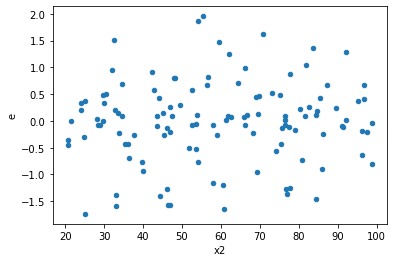

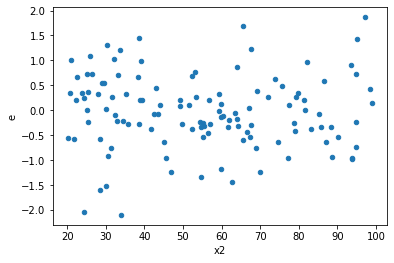

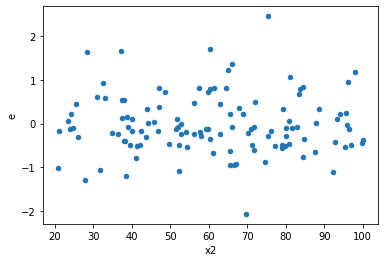

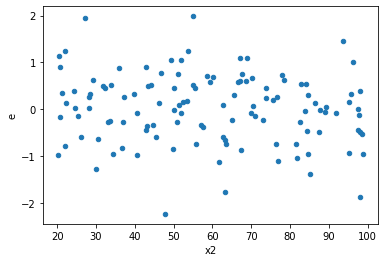

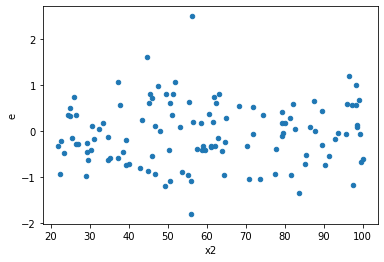

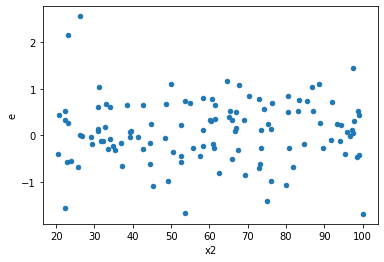

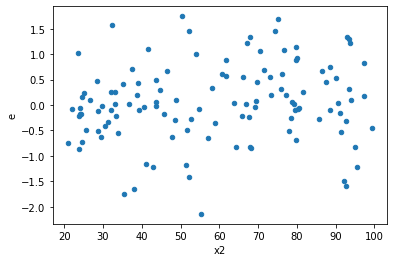

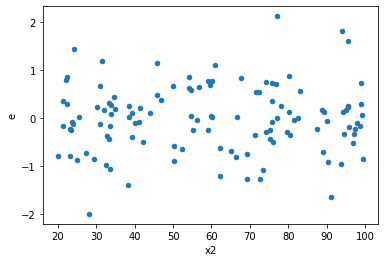

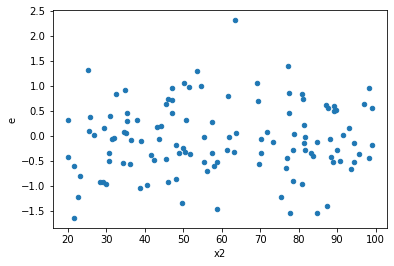

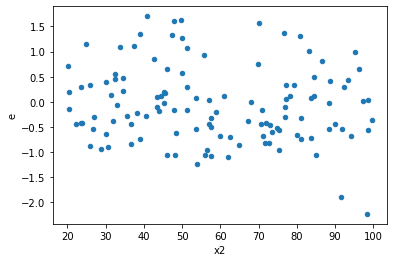

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1, x2, x3
    new_table_sort = new_table.sort_values(by=['x1', 'x2', 'x3'])
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,18.391615704109455,28.445123868244334,0.4087025712024323,0.632113863738763,1.5466353976659326,0.14736818260754592,0.926315908696227,0.07368409130377296,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,22.741052303757513,27.352165230548202,0.5053567178612781,0.6078258940121822,1.202766031457075,0.5383017991652443,0.7308491004173778,0.26915089958262217,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,13.460017651118843,20.81295200205929,0.29911150335819653,0.46251004449020644,1.546279696024711,0.14758010005491906,0.9262099499725405,0.07379005002745953,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,24.990306700632534,27.858255882089214,0.5553401489029451,0.6190723529353158,1.1147624643351852,0.7171375934717332,0.6414312032641334,0.3585687967358666,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,17.555517472790495,37.84257523216427,0.3901226105064554,0.8409461162703171,2.1555944044837716,0.011354646535745472,0.9943226767321273,0.005677323267872736,Reject005=0 : Heteroscedasticity
13.0,45.0,45.0,19.94083954230997,28.09291625664765,0.4431297676068882,0.6242870279255034,1.4088131142643625,0.25408729037281264,0.8729563548135937,0.12704364518640632,Reject005=1 : Homoscedasticity
14.0,45.0,45.0,18.206774669968098,21.000943221557932,0.4045949926659577,0.4666876271457318,1.153468618261025,0.6340576507671642,0.6829711746164179,0.3170288253835821,Reject005=1 : Homoscedasticity
16.0,45.0,45.0,17.60510205073828,28.389571703026782,0.39122449001640625,0.6308793711783729,1.6125763782116926,0.11265336482431487,0.9436733175878426,0.056326682412157436,Reject005=1 : Homoscedasticity
18.0,45.0,45.0,14.963176794002695,25.75469228241493,0.3325150398667266,0.5723264951647762,1.7212048375140174,0.07179986107943392,0.964100069460283,0.03589993053971696,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,18.391615704109455,28.445123868244334,0.4087025712024323,0.632113863738763,1.5466353976659326,0.14736818260754592,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,37.03916876427979,17.138561922660813,0.8230926392062177,0.3808569316146847,0.46271453961971926,0.011088691745920636,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,22.741052303757513,27.352165230548202,0.5053567178612781,0.6078258940121822,1.202766031457075,0.5383017991652443,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,13.460017651118843,20.81295200205929,0.29911150335819653,0.46251004449020644,1.546279696024711,0.14758010005491906,Reject005=1 : Homoscedasticity
4.0,45.0,45.0,24.142710272508314,19.70126642150833,0.536504672722407,0.43780592047796285,0.8160337509389934,0.498069267687977,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,24.990306700632534,27.858255882089214,0.5553401489029451,0.6190723529353158,1.1147624643351852,0.7171375934717332,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,17.555517472790495,37.84257523216427,0.3901226105064554,0.8409461162703171,2.1555944044837716,0.011354646535745472,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,21.638137171809845,12.513662431845457,0.4808474927068854,0.2780813873743435,0.5783151448059148,0.06944846210952345,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,25.215224115921366,21.085298566493496,0.5603383136871415,0.46856219036652214,0.8362130143899789,0.5510174040091995,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      939
Reject005=0 : Heteroscedasticity     61
Name: Result_test, dtype: int64